# Анализ "Most Streamed Spotify Songs 2023"
(Самые прослушиваемые песни Spotify 2023)
##### В этой работе мы проанализируем датасет с самыми прослушиваемыми песнями на площадке Spotify за 2023 год

## Постановка задачи:
**Проанализировать данный датасет с помощью языка Python и его библиотек**, а именно
- провести предобработку для анализа датасета
- создать новые реальные признаки для этого набора данных
- проанализировать более детально данные из датасета
- реализовать несколько визуализаций для полученного набора данных

## Содержание
- Описание датасета

- Предобработка
    - Обработка пропусков
    - Обработка дубликатов
    - Обработка выбросов
    
- Реализация новых признаков для датасета

- Разведывательный анализ данных

- Построение визуализаций

- Выводы

# Описание датасета
Данный набор данных представляет собой множество музыкальных композиций,                                                       
которые были определены как самые прослушиваемые за 2023 год на музыкальной площадке Spotify                                   
Этот датасет имеет большое количество признаков для каждой песни(23), а также большое количество песен для анализа(953)        
Набор данных имеет признаки самых разных типов(бинарные, числовые, номинальные)                                                 
Большинство из этих признаков представляют собой содержательный набор данных, доступный для обработки и анализа

Датасет взят с сайта kaggle                                                   
https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

# Предобработка данных

### Для начала импортируем все необходимые для анализа датасета библиотеки

In [49]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Теперь нужно преобразовать датасет в объект DataFrame для последующей работы с ним

In [50]:
path = os.path.join("datasets", "spotify2023.csv") 
dataset = pd.read_csv(path, encoding='latin-1') # Берем csv-файл из директории проекта

pd.set_option('display.max_rows', 10)    # Включаем просмотр датафрейма по 10 строкам
pd.set_option('display.max_columns', None) # Включаем просмотр датафрейма по всеми столбцам

display(dataset)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


## Обработка пропусков

### Посмотрим на на информацию о всех стобцах датафрейма и проверим ее на предмет пропусков

In [51]:
dataset.info() # посмотрим, нет ли пропусков (Non-Null Count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### В нашем датасете было обнаружено всего 2 столбца с пропусками(in_shazam_charts, key)

Их необходимо обработать

### Чтобы разобраться с пропусками в столбце **key** - мы просто **удалим этот столбец**, потому что он не несёт в себе интересных для анализа данных

Так же можно интерпретировать это так, что мы решили избавляться от столбцов с более 9% пропусков.                              
То есть реализуем удаление столбцов с колчиеством Non-Null элементов - менее 91%

In [52]:
clear_ds = dataset.dropna(axis="columns", thresh=0.91 * len(dataset), inplace=False) # Удаляем пропуски
clear_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  mode                  953 non-null    ob

### Есть несколько методов избавления от пропусков                                                                              
в случае столбца **in_shazam_charts** мы не будем удалять его(так как он содержит интересные и содержательные данные)
и замена на 0 тоже не подойдёт, потому что 0 в этом признаке - конкретное значение.                                            
Тогда мы **заменим все пропуски на среднее значение по столбцу**

In [53]:
def toInt(clear_ds): # Функция заменяющая , на .  и конвертирующее знчение в int
  return (clear_ds['in_shazam_charts'].replace(',', ''))

# Ещё раз очистим пропуски в столбце key, чтобы избежать ошибок пользователя при выполнении этого блока
clear_ds = dataset.dropna(axis="columns", thresh=len(dataset) - 50, inplace=False)

without_nan = clear_ds.dropna()
without_nan.loc[:, 'in_shazam_charts'] = without_nan.apply(toInt, axis = 1) # Применим apply(), чтобы перевести в Int все строки
# Вычислим среднее арифметическое
m = round(
    without_nan.loc[:,"in_shazam_charts"].astype(int).mean())
# Заменим все пропуски на среднее(m)
clear_ds.loc[:,"in_shazam_charts"] = clear_ds.loc[:,"in_shazam_charts"].replace(np.nan, m)

### После этого проверим наш почищенный от пропусков датасет

In [54]:
clear_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  mode                  953 non-null    ob

## Обработка дубликатов

### Проверим датасет на дубликаты  

In [55]:
# Выведем датасет с признаком наличия дубликатов в каждом столбце
duplicate = clear_ds.duplicated ()
false_count, true_count = 0, 0
for elem in duplicate:
    # Посчитаем сколько дубликатов и сколько идентичных элементов
    if elem == False:
        false_count += 1
    else: 
        true_count += 1
        
print(f"Повторяющихся строк - {true_count}")
print(f"Идентичных строк - {false_count}")

Повторяющихся строк - 0
Идентичных строк - 953


В нём нет повторяющихся строк, то есть записи подобраны корректно(без повторов)

## Обработка выбросов

### Проверим датасет на предмет выбросов

**Однако перед этим - стоит поменять тип данных(dtype) в столбцах типа object, которые содержат числа**                        
Такие столбцы на самом деле представляют собой признак с численными значениями, но по-разным причинам были интерпретированы компилятором в тип object(например из-за запятых в числах или случайных строк, попавшим в набор данных)

Таковыми столбцами являются in_shazam_charts, streams и in_deezer_playlists

In [56]:
# Чтобы перевести в Int - уберем все запятые и сконвертируем в тип int64
def column_toInt(df, name_column):
    df.loc[:, name_column] = df.loc[:, name_column].astype("str")
    int_seria = df.loc[:, name_column].str.replace(',', '').astype("int64")
    # Получим локацию заменяемой колонки
    location = df.columns.get_loc(name_column)
    # Удалим заменяемую колонку
    df = df.drop(columns=name_column, axis=1)
    # Вставим колонку типа Int на ёё место
    df.insert(loc=location, column=f'{name_column}', value=int_seria)
    
    return df

### После применения функции - все 3 строки обретут тип int64

In [57]:
clear_ds = column_toInt(clear_ds, 'in_shazam_charts')

# В столбце streams был обнаружен 1 некорректный элемент, который имеет строковое значение
clear_ds.loc[574, "streams"] = clear_ds.loc[:, "streams"].mode()[0] # Заменим некорректное значение в датасете модой
clear_ds = column_toInt(clear_ds, 'streams')

clear_ds = column_toInt(clear_ds, 'in_deezer_playlists')

clear_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  mode                  953 non-null    ob

### И теперь можем приступить к **изучению выбросов** - построим стандартный график boxplot, чтобы отследить все выбросы

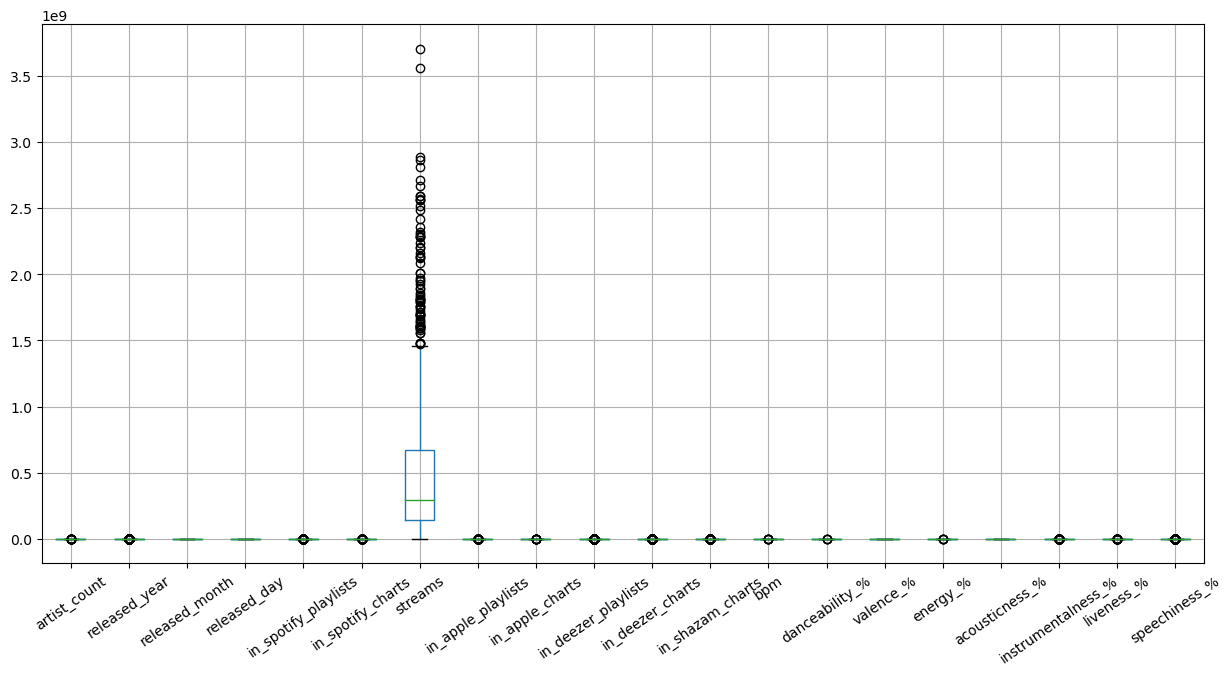

In [58]:
plt.rcParams["figure.figsize"] = 15, 7  # зададим размеры фигур (width, height)
clear_ds.boxplot()
plt.xticks(rotation=35) # Чтобы все подписи поместились под осью - повернем их на 35 градусов
plt.show()

### Из-за того что признак streams получился со значениями, намного большими, чем в остальных признаках - все остальные получились очень маленькими на графике

Чтобы рассмотреть получше все "ящики с усами" - мы изменим диапазон просмотра по оси y

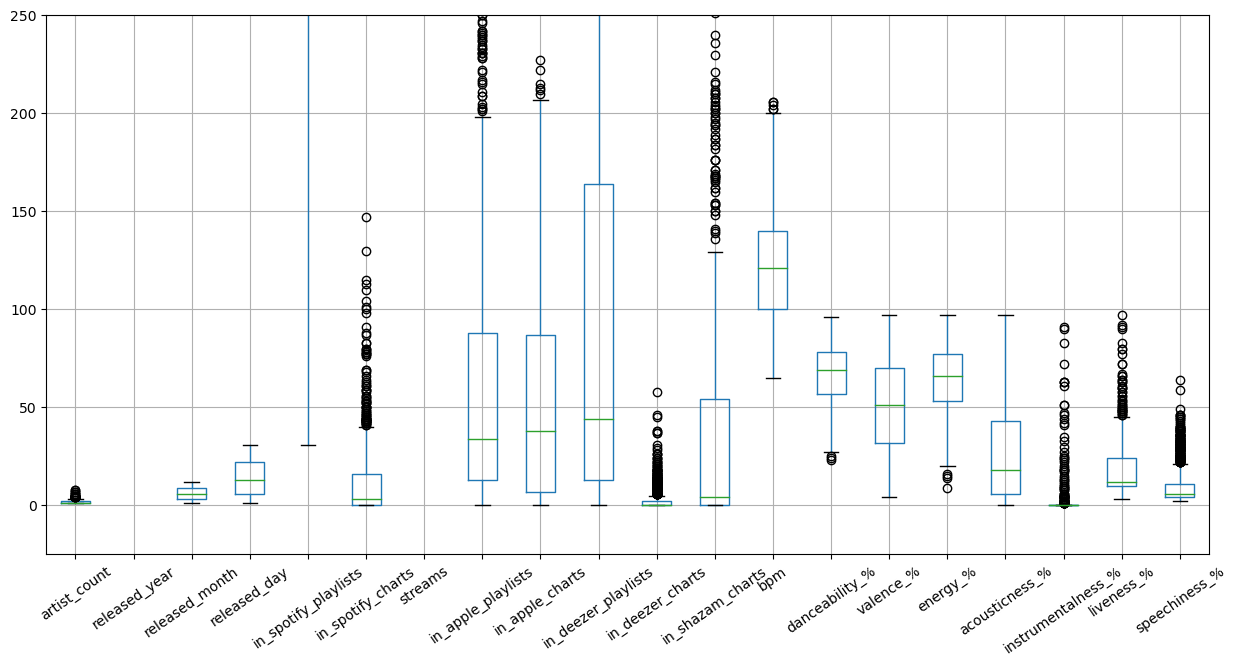

In [59]:
plt.ylim(-25, 250)  # ограничим диапазон значений по оси Oy

clear_ds.boxplot()
plt.xticks(rotation=35) # Чтобы все подписи поместились под осью - повернем их на 35 градусов
plt.show()

### И еще посмотрим на boxplot с признаком released_year
Потому что он не попал в зону видимости на предыдущих графиках

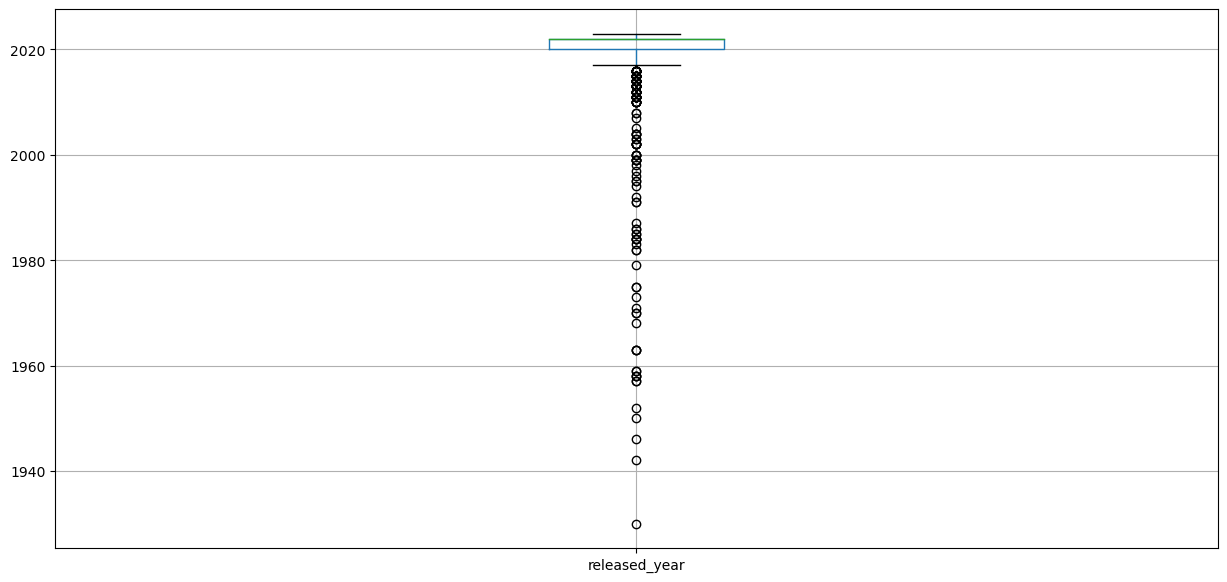

In [60]:
clear_ds.boxplot('released_year')
plt.show()

# Визуально проанализировав эти три изображения можно сделать вывод о том, что всего 4 признака не имеют выбросов
- released_month 
- released_day 
- valence_%
- acousticness_%


А также если посмотреть, то можно увидеть, что у большинства ящиков с усами выбросов достаточно большое количество             
Учитывая этот факт, отсутствие отрицательных значений и предметную область этих выборок, можно сделать вывод о том, что эти значения, скорее всего, не являются ошибками.

Мы с вами обратим внимания на те выборки, в которых количество выбросов **меньше 7**
- artist_count
- in_apple_charts
- bpm
- danceability_%
- energy_%

В них для разнообразия можно **заменить выбросы на медиану(её еще не использовали)**, так как они близкие к нормальным значениям и их немного                         
Это "подчистит" наш датасет и при этом незначительно повлияет на результаты

In [61]:
def outliers(row): # Метод межквартильного размаха
    q_1 = np.quantile(row, 0.25) 
    q_3 = np.quantile(row, 0.75) 
    IQR = q_3 - q_1
    return np.where((row < (q_1 - IQR * 1.5)) | (row > (q_3 + IQR * 1.5)), row.median(), row)

edit_columns = ["artist_count", "in_apple_charts", "bpm", 'danceability_%', "energy_%"]
# В цикле обработаем выбранные колонки с помощью метода меэквартильного размаха
for col in edit_columns:
    clear_ds[col] =  outliers(clear_ds[col])

### Теперь они не имеют выбросов
Посмотрим только на изменяемые выборки

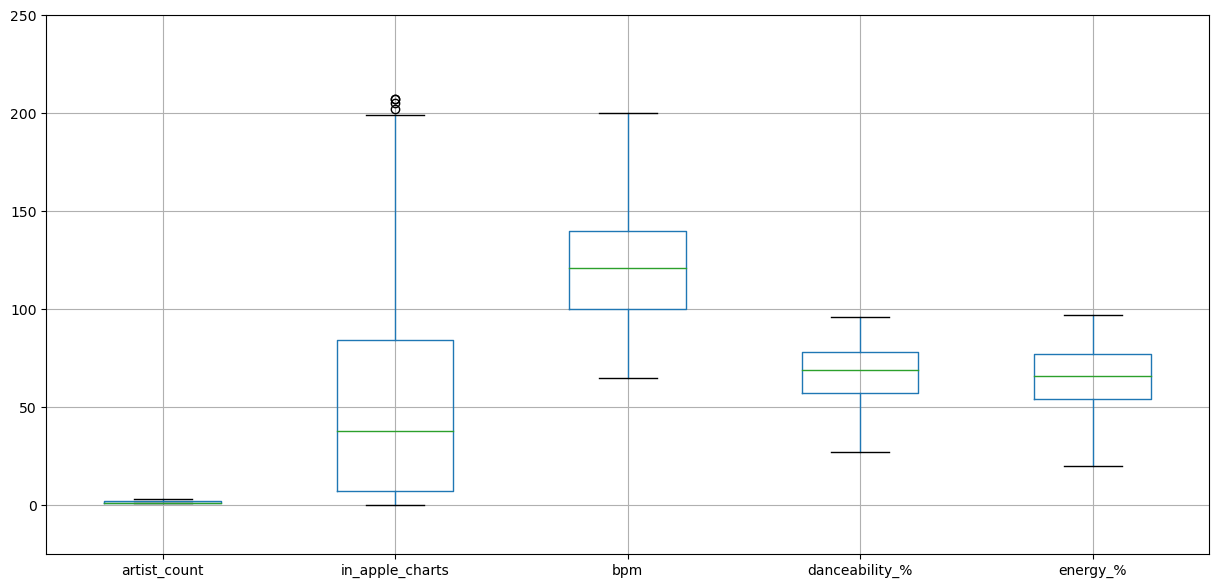

In [62]:
plt.ylim(-25, 250)  # ограничим диапазон значений по оси Oy
clear_ds.boxplot(edit_columns)
plt.show()

### И общая картина всех ящиков выглядит почище

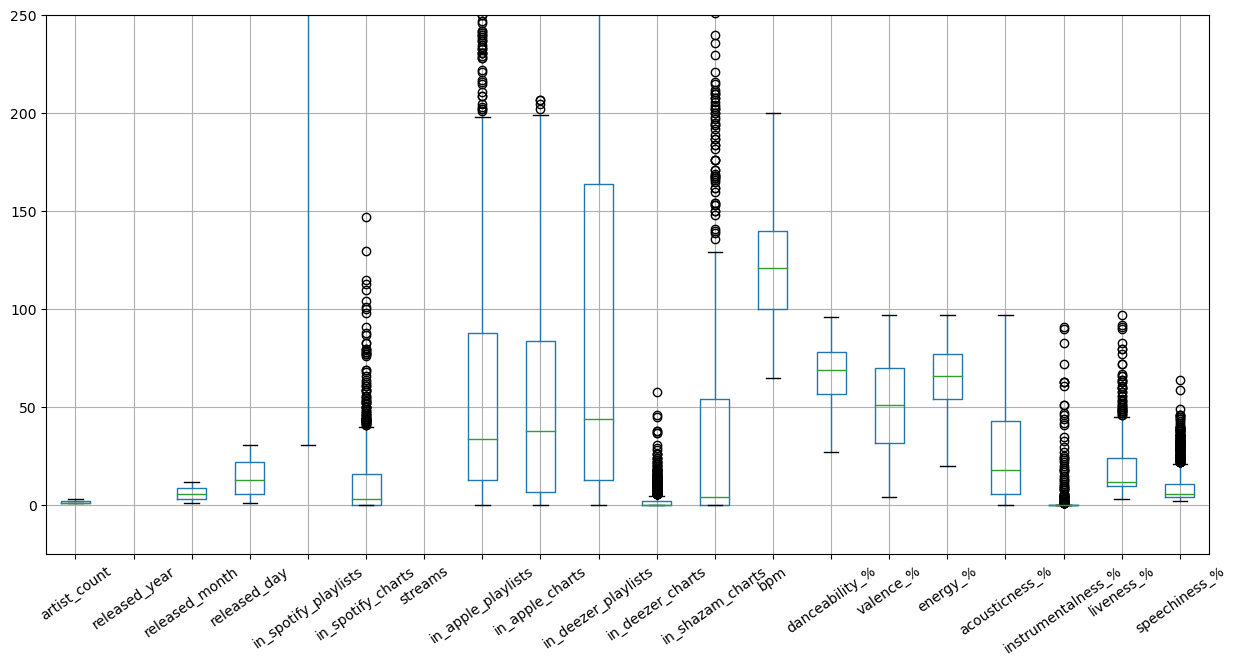

In [63]:
plt.ylim(-25, 250)  # ограничим диапазон значений по оси Oy

clear_ds.boxplot()
plt.xticks(rotation=35)
plt.show()

# Реализация новых принаков для датасета

### Придумаем новые признаки для нашего датасета

Для каждой песни известно **BPM**,                                                                                           
Определенному числу ударов в минуту соответствует один или несколько **жанров музыки**                                           
### Определим для каждой песни жанр по её BPM(столбец genre_by_bpm - номинальный признак)

In [64]:
# В зависимости от BPM будет выбран один или несколько жанров для песни
def genre_by_bpm(bpm):
    genre = ''
    if bpm in range(70, 96):
        genre += "rock, "
    if bpm in range(70, 111):
        genre += "R&B, "
    if bpm in range(80, 131):
        genre += "hip-hop, "
    if bpm in range(110, 141):
        genre += "pop, "
    if bpm in range(120, 146):
        genre += "EDM, "
    if bpm in range(130, 156):
        genre += "techno, "
    if (bpm < 70) | (bpm > 155):
        genre = "unknown  "

    genre = genre[:len(genre)-2]
    return genre

pd.set_option('display.max_rows', 10)
# Выведем все данные в целочисленном виде
pd.set_option('display.float_format', '{:.0f}'.format)
# Зададим список столбцов для вывода
selection_list = ['track_name', 'bpm', 'genre_by_bpm']
clear_ds['genre_by_bpm'] = clear_ds['bpm'].apply(genre_by_bpm)
clear_ds.loc[:, selection_list]

,track_name,bpm,genre_by_bpm
0,Seven (feat. Latto) (Explicit Ver.),125,"hip-hop, pop, EDM"
1,LALA,92,"rock, R&B, hip-hop"
2,vampire,138,"pop, EDM, techno"
3,Cruel Summer,170,unknown
4,WHERE SHE GOES,144,"EDM, techno"
...,...,...,...
948,My Mind & Me,144,"EDM, techno"
949,Bigger Than The Whole Sky,166,unknown
950,A Veces (feat. Feid),92,"rock, R&B, hip-hop"
951,En La De Ella,97,"R&B, hip-hop"


### Так же можно вывести новый бинарный признак - состоит ли песня в топ-10 каждого чарта музыкальных площадок(из рассматриваемых - spotify, apple music, deezer, shazam)                                       
Таких песен всего 3(id: 301, 478, 898)

In [65]:
# Если место меньше 10 и больше 0, то он состоит в топ-10
def contain_chart(number):
    if (number < 10) & (number > 0):
        return True
    else:
        return False

# Применим функцию проверки к 4 столбцам и к каждой записи в них - перемножим и получим True, если только все 4 есть в топ-10
clear_ds['top10_in_charts'] = (
        clear_ds['in_spotify_charts'].apply(contain_chart) *
        clear_ds['in_apple_charts'].apply(contain_chart) *
        clear_ds['in_deezer_charts'].apply(contain_chart) *
        clear_ds['in_shazam_charts'].apply(contain_chart))
# Зададим список столбцов для вывода
selection_list = ['track_name', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'top10_in_charts']
display(clear_ds.loc[:, selection_list])

,track_name,in_spotify_charts,in_apple_charts,in_deezer_charts,top10_in_charts
0,Seven (feat. Latto) (Explicit Ver.),147,38,10,False
1,LALA,48,126,14,False
2,vampire,113,207,14,False
3,Cruel Summer,100,207,12,False
4,WHERE SHE GOES,50,133,15,False
...,...,...,...,...,...
948,My Mind & Me,0,13,1,False
949,Bigger Than The Whole Sky,0,0,0,False
950,A Veces (feat. Feid),0,0,0,False
951,En La De Ella,0,26,0,False


### Еще один похожий бинарный признак - состоит ли песня в плейлистах всех  музыкальных площадок(из рассматриваемых)
Таких получится много - 910

In [66]:
# Если количество не 0, то трек состоит в плейлистах площадки
def contain_chart(number):
    if (number != 0):
        return True
    else:
        return False
    
# Применим функцию проверки к 3 столбцам и к кажд. записи в них - перемножим и получим True, если только все 3 есть на площадках
clear_ds['in_all_playlists_fact'] = (
        clear_ds['in_spotify_playlists'].apply(contain_chart) *
        clear_ds['in_apple_playlists'].apply(contain_chart) *
        clear_ds['in_deezer_playlists'].apply(contain_chart))

# Зададим список столбцов для вывода
selection_list = ['track_name', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_all_playlists_fact']
display(clear_ds.loc[:, selection_list])

,track_name,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,in_all_playlists_fact
0,Seven (feat. Latto) (Explicit Ver.),553,43,45,True
1,LALA,1474,48,58,True
2,vampire,1397,94,91,True
3,Cruel Summer,7858,116,125,True
4,WHERE SHE GOES,3133,84,87,True
...,...,...,...,...,...
948,My Mind & Me,953,61,37,True
949,Bigger Than The Whole Sky,1180,4,8,True
950,A Veces (feat. Feid),573,2,7,True
951,En La De Ella,1320,29,17,True


### Теперь выведем количественный признак - возраст песни(посчитаем с помощью года выпуска песни)

In [67]:
clear_ds['track_age'] = 2023 - clear_ds['released_year']
# Зададим список столбцов для вывода
selection_list = ['track_name', 'released_year', 'track_age']
display(clear_ds.loc[:, selection_list])

,track_name,released_year,track_age
0,Seven (feat. Latto) (Explicit Ver.),2023,0
1,LALA,2023,0
2,vampire,2023,0
3,Cruel Summer,2019,4
4,WHERE SHE GOES,2023,0
...,...,...,...
948,My Mind & Me,2022,1
949,Bigger Than The Whole Sky,2022,1
950,A Veces (feat. Feid),2022,1
951,En La De Ella,2022,1


### И последний количественный признак - количество плейлистов, в которых есть эта песня(со всех рассматриваемых площадок)

In [68]:
# Просуммируем вхождения в плейлисты всех площадок
clear_ds['in_all_playlists'] =     \
    (clear_ds['in_spotify_playlists'] +
    clear_ds['in_apple_playlists'] +
    clear_ds['in_deezer_playlists'])
# Зададим список столбцов для вывода
selection_list = ['track_name', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_all_playlists']
display(clear_ds.loc[:, selection_list])

,track_name,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,in_all_playlists
0,Seven (feat. Latto) (Explicit Ver.),553,43,45,641
1,LALA,1474,48,58,1580
2,vampire,1397,94,91,1582
3,Cruel Summer,7858,116,125,8099
4,WHERE SHE GOES,3133,84,87,3304
...,...,...,...,...,...
948,My Mind & Me,953,61,37,1051
949,Bigger Than The Whole Sky,1180,4,8,1192
950,A Veces (feat. Feid),573,2,7,582
951,En La De Ella,1320,29,17,1366


# Разведывательный анализ данных 

### Сейчас проведем разведывательный анализ данных 
Для начала с помощью функции датафрейма describe() - посмотрим на основные показатели выборки каждого признака

In [69]:
clear_ds.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_age,in_all_playlists
count,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953
mean,1,2018,6,14,5200,12,514881752,68,50,385,3,60,122,67,51,64,27,2,18,10,5,5653
std,1,11,4,9,7898,20,567024917,86,47,1131,6,157,27,14,23,16,26,8,14,10,11,8915
min,1,1930,1,1,31,0,2762,0,0,0,0,0,65,27,4,20,0,0,3,2,0,34
25%,1,2020,3,6,875,0,141720999,13,7,13,0,0,100,57,32,54,6,0,10,4,1,915
50%,1,2022,6,13,2224,3,290833204,34,38,44,0,4,121,69,51,66,18,0,12,6,1,2308
75%,2,2022,9,22,5542,16,674072710,88,84,164,2,54,140,78,70,77,43,0,24,11,3,5992
max,3,2023,12,31,52898,147,3703895074,672,207,12367,58,1451,200,96,97,97,97,91,97,64,93,62623


Отсюда можно сделать **множество интересных выводов** по песням из Spotify, например:
- максимальное количество артистов в песне - **3**
- самый ранний год выпуска песни - **1930**
- самое большое и маленькое количество прослушиваний песни - **3703895074 / 2762**
- самое низкое и высокое bpm песни - **65 / 200**
- Средний возраст каждой песни - **5 лет**
- Медиана количества плейлистов, в которых есть песня - **2308**
- Медиана процента танцевальности песни - **69%**
- и так далее

### Теперь посмотрим на показатели не числовых стобцов(bool и object):
    Сначала найдем все такие столбцы

In [70]:
not_numeric_cols = []
# Пройдемся по всем столбцам
for col in clear_ds:
    # Если тип object или bool, то добавляем его в список не числовых колонок
    if pd.api.types.is_object_dtype(clear_ds[col].dtype) | pd.api.types.is_bool_dtype(clear_ds[col].dtype):
        not_numeric_cols.append(col)
        
not_numeric_cols

['track_name',
 'artist(s)_name',
 'mode',
 'genre_by_bpm',
 'top10_in_charts',
 'in_all_playlists_fact']

### Теперь применим describe() к этим столбцам(нам покажут другие показатели, применимые к нечисловым признакам)

In [71]:
pd.set_option('display.max_rows', 10)
clear_ds[not_numeric_cols].describe()

,track_name,artist(s)_name,mode,genre_by_bpm,top10_in_charts,in_all_playlists_fact
count,953,953,953,953,953,953
unique,943,645,2,11,2,2
top,Daylight,Taylor Swift,Major,"rock, R&B, hip-hop",False,True
freq,2,34,550,162,950,910


Можем сделать **выводы** из этих признаков:
- Всего в датасете **10** повторяющихся названий песен(953-940)
- **308** одинаковых авторов песен(953-645)
- Самое распространенное название песни - **Daylight**
- Самый распространенный артист - **Taylor Swift**
- Количество песен Taylor Swift - **34**
- И так далее

# Теперь можем применить группировку к некоторым столбцам, чтобы узнать ещё больше информации
В принципе, мы уже нашли все основные данные по всем признакам через describe(), теперь попробуем отобрать более специфичные данные через groupby()

### Cначала посмотрим на количество прослушиваний по каждому году выпуска песен
Сгруппируем столбец года выпуска и посчитаем сумму по столбцу прослушиваний

In [72]:
pd.set_option('display.max_rows', 10)    # Включаем просмотр датафрейма по 10 строкам
group_ds = clear_ds.groupby('released_year', as_index=False).aggregate({'streams': 'sum'})
group_ds.sort_values(by = 'released_year', ascending=False) # отсортируем год выпуска, чтобы смотреть с 2023 года

,released_year,streams
49,2023,25808484104
48,2022,116402377962
47,2021,73808103039
46,2020,34703731857
45,2019,37870932581
...,...,...
4,1952,395591396
3,1950,473248298
2,1946,389771964
1,1942,395591396


### Теперь посмотрим на количество песен каждого жанра(по BPM) 
Сгруппируем столбец жанра по колчеству

In [73]:
group_ds = clear_ds.groupby('genre_by_bpm', as_index=False).aggregate({'track_name': 'count'})
group_ds = group_ds.rename(columns={'track_name': 'count'}) # Переименуем для читабельности
group_ds.sort_values(by = 'count', ascending=False)

,genre_by_bpm,count
8,"rock, R&B, hip-hop",162
1,"R&B, hip-hop",151
4,"hip-hop, pop, EDM",151
10,unknown,123
6,"pop, EDM, techno",101
...,...,...
9,techno,65
0,"EDM, techno",48
5,"hip-hop, pop, EDM, techno",31
7,"rock, R&B",28


### И ещё можно разделить каждый жанр на режимы минорные и мажорные и  посмотреть на количество прослушиваний каждого из режимов
Сгруппируем столбец жанра и режима, и посчитаем сумму по столбцу прослушиваний

In [74]:
group_ds = clear_ds.groupby(['genre_by_bpm', 'mode'], as_index=False).aggregate({'streams': 'sum'})
group_ds

,genre_by_bpm,mode,streams
0,"EDM, techno",Major,14977615458
1,"EDM, techno",Minor,4250771589
2,"R&B, hip-hop",Major,42578873066
3,"R&B, hip-hop",Minor,40182715289
4,"R&B, hip-hop, pop",Major,11364434889
...,...,...,...
17,"rock, R&B, hip-hop",Minor,31282976419
18,techno,Major,17645303926
19,techno,Minor,13422158163
20,unknown,Major,49152242257


### Теперь построим корреляционную матрицу

Для начала **получим все числовые и бинарные признаки** аналогичным способом как мы искали нечисловые                              
После этого **построим матрицу** на основе полученных признаков(признаков много, поэтому матрица очень большая)

In [75]:
pd.set_option('display.float_format', '{:.2f}'.format)
numeric_cols = []
for col in clear_ds:
    # Если тип не object, то добавляем его в список числовых колонок
    if not (pd.api.types.is_object_dtype(clear_ds[col].dtype)):
        numeric_cols.append(col)

cor_matrix = clear_ds[numeric_cols].corr()
cor_matrix

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,top10_in_charts,in_all_playlists_fact,track_age,in_all_playlists
artist_count,1.00,0.08,0.02,0.00,-0.07,0.03,-0.10,-0.02,-0.04,-0.05,0.03,0.01,-0.06,0.20,0.10,0.14,-0.10,-0.08,0.07,0.14,0.08,0.06,-0.08,-0.07
released_year,0.08,1.00,0.08,0.17,-0.39,0.07,-0.23,-0.20,-0.05,-0.31,0.10,0.02,0.01,0.15,-0.06,0.08,-0.12,-0.01,-0.01,0.13,0.02,-0.02,-1.00,-0.39
released_month,0.02,0.08,1.00,0.08,-0.10,-0.05,-0.03,-0.00,-0.01,-0.09,-0.01,-0.09,-0.04,-0.04,-0.12,-0.08,0.05,0.03,-0.01,0.04,0.00,0.02,-0.08,-0.10
released_day,0.00,0.17,0.08,1.00,-0.08,0.02,0.01,0.03,0.01,-0.08,0.07,0.02,-0.03,0.05,0.04,0.05,-0.01,0.02,0.00,-0.02,0.01,0.07,-0.17,-0.08
in_spotify_playlists,-0.07,-0.39,-0.10,-0.08,1.00,0.16,0.79,0.71,0.30,0.83,0.14,0.08,-0.02,-0.10,-0.02,0.03,-0.06,-0.03,-0.05,-0.09,-0.03,0.11,0.39,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
speechiness_%,0.14,0.13,0.04,-0.02,-0.09,-0.08,-0.11,-0.11,-0.15,-0.06,-0.08,-0.05,0.05,0.18,0.04,-0.01,-0.02,-0.08,-0.02,1.00,0.02,0.04,-0.13,-0.09
top10_in_charts,0.08,0.02,0.00,0.01,-0.03,-0.03,-0.04,-0.03,-0.06,-0.02,-0.02,-0.02,-0.00,0.02,0.07,0.02,0.02,-0.01,0.01,0.02,1.00,0.01,-0.02,-0.03
in_all_playlists_fact,0.06,-0.02,0.02,0.07,0.11,0.06,0.09,0.15,0.16,0.06,0.05,0.07,0.02,0.08,-0.02,-0.02,-0.04,0.02,0.03,0.04,0.01,1.00,0.02,0.11
track_age,-0.08,-1.00,-0.08,-0.17,0.39,-0.07,0.23,0.20,0.05,0.31,-0.10,-0.02,-0.01,-0.15,0.06,-0.08,0.12,0.01,0.01,-0.13,-0.02,0.02,1.00,0.39


В таком виде матрицу трудно визуально анализировать                                                                          
### Придадим ей вид тепловой матрицы, чтобы можно было рассмотреть более интересные коэффициенты

In [76]:
cor_matrix.style.background_gradient(cmap='RdYlGn')

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,top10_in_charts,in_all_playlists_fact,track_age,in_all_playlists
artist_count,1.000000,0.082978,0.019302,0.000589,-0.072352,0.027218,-0.102236,-0.022633,-0.043868,-0.051023,0.026266,0.011050,-0.061717,0.203907,0.100514,0.137198,-0.100159,-0.075701,0.069701,0.143616,0.076550,0.063027,-0.082978,-0.070787
released_year,0.082978,1.000000,0.076714,0.174282,-0.392204,0.069678,-0.234021,-0.198998,-0.052748,-0.306812,0.095389,0.018589,0.008845,0.151778,-0.059355,0.078621,-0.124156,-0.014562,-0.005819,0.133819,0.020713,-0.015360,-1.000000,-0.388289
released_month,0.019302,0.076714,1.000000,0.080313,-0.104757,-0.047623,-0.026746,-0.000164,-0.011030,-0.088004,-0.005286,-0.088913,-0.041639,-0.044568,-0.118571,-0.077201,0.054430,0.033985,-0.012348,0.039838,0.004726,0.023321,-0.076714,-0.103965
released_day,0.000589,0.174282,0.080313,1.000000,-0.079669,0.021877,0.008732,0.026410,0.014544,-0.084558,0.073288,0.019600,-0.029651,0.049848,0.042779,0.047616,-0.005788,0.019280,0.001566,-0.015826,0.008570,0.068170,-0.174282,-0.081046
in_spotify_playlists,-0.072352,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.788751,0.708277,0.299483,0.826404,0.144342,0.076203,-0.020415,-0.104397,-0.021883,0.032179,-0.064421,-0.028134,-0.046695,-0.089722,-0.032087,0.109024,0.392204,0.997563
in_spotify_charts,0.027218,0.069678,-0.047623,0.021877,0.164331,1.000000,0.244765,0.233354,0.467890,0.088358,0.600205,0.574234,0.037719,0.024460,0.035531,0.094869,-0.054987,-0.010146,-0.047552,-0.081765,-0.025876,0.055397,-0.069678,0.159048
streams,-0.102236,-0.234021,-0.026746,0.008732,0.788751,0.244765,1.000000,0.770495,0.348586,0.597228,0.227806,0.021745,-0.006229,-0.109128,-0.039457,-0.033545,-0.005493,-0.045112,-0.048414,-0.113155,-0.036876,0.086492,0.234021,0.781959
in_apple_playlists,-0.022633,-0.198998,-0.000164,0.026410,0.708277,0.233354,0.770495,1.000000,0.430703,0.472109,0.369032,0.131174,0.016216,-0.018883,0.057075,0.053180,-0.061781,-0.057219,-0.049596,-0.108011,-0.034785,0.153884,0.198998,0.697026
in_apple_charts,-0.043868,-0.052748,-0.011030,0.014544,0.299483,0.467890,0.348586,0.430703,1.000000,0.193734,0.331579,0.309737,0.021413,-0.033755,0.038518,0.112922,-0.084913,-0.006708,-0.003733,-0.150194,-0.055070,0.160452,0.052748,0.294056
in_deezer_playlists,-0.051023,-0.306812,-0.088004,-0.084558,0.826404,0.088358,0.597228,0.472109,0.193734,1.000000,0.066593,0.075097,-0.032295,-0.074402,-0.013859,0.062728,-0.063282,-0.016973,-0.026743,-0.062274,-0.017664,0.063047,0.306812,0.863500


### Анализ корреляционной матрицы

**Нам интересны только значения в близи 1 или -1**, так как это будет означать сильную прямую или обратную зависимости соответственно.                                                                          
А связей со слабой зависимостью большинство, и мы их рассматривать не будем

Сразу же можно заметить, что сильная обратная зависимость между **годом выпуска песни** и её **возрастом**,                          
это очевидная связь, так как мы составляли признак возраста по функции **"возраст = 2023 - год_выпуска"**

Так же стоит обратить внимание на сильную связь между **количеством плейлистов на всех площадках** и **количеством плейлистов в спотифае** - **0.997**                                                                           
**Количество плейлистов на всех площадках** имеет достаточно сильную зависимость с кол-вом плейлистов и в **apple_music** и в **deezer**, однако со спотифаем имеет самую большую связь, почти единицу.                                                                              
**Можно сделать вывод, что плейлистов с песнями спотифая здесь больше всего, но оно и логично, так как это датасет с песнями спотифая**

Всего получилось 2 связи, максимально близкие к единице.

Тогда **далее мы отберем остальные интересные результаты**, 
которые имеют не максимально сильную, но тем не менее хорошую связь(как прямую так и обратную)                                 
### Сначала поищем через цикл все значения больше 0.997(чтобы не видеть уже рассмотренные)

In [77]:
# Проверка, если связи найдены, то запускаем цикл с выводом всех связей
def check_connect_column(connect_column, name, connect_array):
    if connect_column.count()[0] > 0:
        for connect_name in connect_column.index:
            print_connect(name, connect_name, connect_array)

# Печатаем все связи без повторений(через массив, хранящий связи)
def print_connect(name, connect_name, connect_array):
    if not (connect_name, name) in connect_array:
        connect_array.append((name, connect_name))
        print(f'Столбец {name} имеет коэф коррелляции {round(cor_matrix.loc[name, connect_name],3)} cо столбцом {connect_name}')
        
# Проходим по названиям всех колонок матрицы
def find_connect(cor_matrix, min_value, max_value):
    connect_array = []
    for name in cor_matrix.columns:
        connect_column = cor_matrix.loc[(cor_matrix[name] >= min_value) & (cor_matrix[name] < max_value)]
        check_connect_column(connect_column, name, connect_array)

# Ищем все корреляции от 0.9 до 1
find_connect(cor_matrix, 0.9, 0.997)

Как мы видим, ничего не вывелось, то есть корреляций >0.9 больше нет в нашем датасете, кроме рассмотренных

### Тогда возьмем планку пониже, поищем от 0.8

In [78]:
find_connect(cor_matrix, 0.8, 0.997)

Столбец in_spotify_playlists имеет коэф коррелляции 0.826 cо столбцом in_deezer_playlists
Столбец in_deezer_playlists имеет коэф коррелляции 0.863 cо столбцом in_all_playlists


Мы видим достаточно сильную зависимость между **количеством плейлистов с песнями в спотифае** и в **deezer**                   
А также более сильную зависимость между **количеством плейлистов с песнями в deezer** и **на всех площадках**

Из этого **можно сделать вывод, что кол-во плейлистов с песнями из deezer неслабо влияет на количество плейлистов со всех площадок, меньше, чем спотифай, но тоже достаточно сильно**

А также **вывод о том, что число плейлистов, попадающих в deezer, попадает и в спотифай**

### Теперь поищем корреляции > 0.7

In [79]:
find_connect(cor_matrix, 0.7, 0.8)

Столбец in_spotify_playlists имеет коэф коррелляции 0.789 cо столбцом streams
Столбец in_spotify_playlists имеет коэф коррелляции 0.708 cо столбцом in_apple_playlists
Столбец streams имеет коэф коррелляции 0.77 cо столбцом in_apple_playlists
Столбец streams имеет коэф коррелляции 0.782 cо столбцом in_all_playlists


В этой нише у нас расположилась связь **прослушиваний** со **всеми площадками кроме deezer по количествам плейлистов**                 
Из этого **следует, что чем больше у песни прослушиваний, тем в большее количество плейлистов на всех площадках она попадает, однако с deezer это отслеживается в меньшей степени, чем на остальных площадках**

А также связь **плейлистов в спотифае** и в **apple** - **здесь такая же история как в deezer, только зависимость на целый порядок меньше(число плейлистов, попадающих в apple, попадает и в спотифай)**

### Ну и проверим слабые связи > 0.5

In [80]:
find_connect(cor_matrix, 0.5, 0.7)

Столбец in_spotify_charts имеет коэф коррелляции 0.6 cо столбцом in_deezer_charts
Столбец in_spotify_charts имеет коэф коррелляции 0.574 cо столбцом in_shazam_charts
Столбец streams имеет коэф коррелляции 0.597 cо столбцом in_deezer_playlists
Столбец in_apple_playlists имеет коэф коррелляции 0.697 cо столбцом in_all_playlists


Теперь мы видим что **чарт песен спотифая** влияет на **чарт deezer** и **shazam**(число песен, попадающих в чарт spotify, попадает и в deezer и в shazam)

И снова связь прослушиваний и плейлистов - **можно подытожить, что прослушивания песен зависят от наличия песни в плейлистах spotify, apple, deezer(по убыванию)**

### Теперь давайте рассмотрим обратные связи между признаками(сразу < -0.6)

In [81]:
find_connect(cor_matrix, -1, -0.6)

Столбец released_year имеет коэф коррелляции -1.0 cо столбцом track_age


Так получилось, что обратных связей критически мало,                                                                          
самая сильная из них - полная обратная зависимость года выпуска и возраста песни(но это мы рассмотрели в самом начале анализа) 

### В таком случае давайте рассмотрим слабые зависимости(< -0.4)

In [82]:
find_connect(cor_matrix, -0.6, -0.4)

Столбец energy_% имеет коэф коррелляции -0.558 cо столбцом acousticness_%


**_Интересная находка_** - Следующим по силе обратной связи стала зависимость **энергичности песни** и **количеством акустического звука в песне**         
Можно сделать **вывод, что чем меньше акустического звука в песне, тем она более энергичная**

### Теперь посмотрим на слабые зависимости

In [83]:
find_connect(cor_matrix, -0.4, -0.2)

Столбец released_year имеет коэф коррелляции -0.392 cо столбцом in_spotify_playlists
Столбец released_year имеет коэф коррелляции -0.234 cо столбцом streams
Столбец released_year имеет коэф коррелляции -0.307 cо столбцом in_deezer_playlists
Столбец released_year имеет коэф коррелляции -0.388 cо столбцом in_all_playlists
Столбец danceability_% имеет коэф коррелляции -0.217 cо столбцом acousticness_%


Имеются так же такие находки как: 
- обратная связь между годом выпуска песни и количеством плейлистов, содержащих пенсю, в спотифае, deezer и на всех площадках
- обратная связь между годом выпуска песни и прослушиваниями
- обратная связь между танцевальностью песни и количеством акустического звука в песне

Однако, эти связи слабые, поэтому делать выводы из них не будем, хотя последняя связь могла бы от части подтверждаться первоц интересной находкой(связь  энергичности песни и количеством акустического звука в песне)

### Ну и для разнообразия можем посмотреть какие признаки имеют нулевую связь

In [84]:
find_connect(cor_matrix, -0.001, 0.001)

Столбец artist_count имеет коэф коррелляции 0.001 cо столбцом released_day
Столбец released_month имеет коэф коррелляции -0.0 cо столбцом in_apple_playlists


# Построение визуализаций

### Теперь построим визуализации к нашему датасету


### Столбчатая диаграмма - зависимость попадания песни в плейлисты от года выпуска

Сначала построим зависимость числа попаданий песни в плейлисты всех площадок от года выпуска песни.                            
Построим визуализацию в виде столбчатой диаграммы

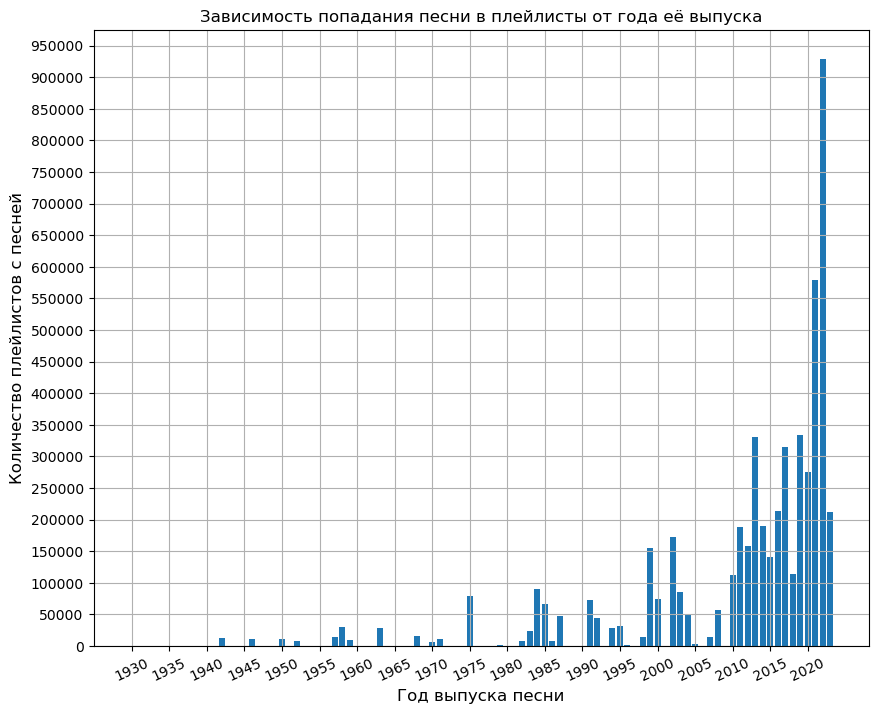

In [85]:
# СТОЛБЧАТАЯ - ПОПАДАНИЕ В ПЛЕЙЛИСТЫ ОТ ГОДА
group_ds = clear_ds.groupby('released_year', as_index=False).aggregate({'in_all_playlists': 'sum'})
group_ds  = group_ds.sort_values(by = 'released_year', ascending=False)
# ОПРЕДЕЛЯЕМ ВЫБОРКИ И КОНСТАНТЫ ДЛЯ ДИАГРАММЫ
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(group_ds['released_year'], group_ds['in_all_playlists'])
# НАСТРАИВАЕМ ВНЕШНИЕ ПАРАМЕТРЫ ДИАГРАММЫ И ВЫВОДИМ ЕЁ
plt.title('Зависимость попадания песни в плейлисты от года её выпуска')
plt.xticks(np.arange(1930, 2023, step=5), rotation=25)
plt.yticks(np.arange(0, 1000000, step=50000))
plt.ylabel("Количество плейлистов с песней", fontsize=12)
plt.xlabel("Год выпуска песни", fontsize=12)
plt.grid()
plt.show()

По данной диаграмме можно сделать **вывод, что чем младше песня, тем больше её вероятность попасть в плейлисты всех площадок**     
Однако это не значит что в текущий год будет максимальное число попаданий в плейлисты,                                         
количество плейлистов варьируется в достаточно больших пределах, поэтому точного предсказания сделать не получится(Так получилось, что наибольшее число плейлистов выпало на 2022 год)

### Линейный график - зависимость BPM от возраста песни

Далее давайте изучим, как менялся BPM песен с годами

Мы сгруппируем песни по возрасту и вычислим средний BPM для каждого возраста песни.                                             
После этого составим линейный график, чтобы отследить, как менялся BPM                                                         
Для визуального эффекта избавимся от точек и выравняем линии графика

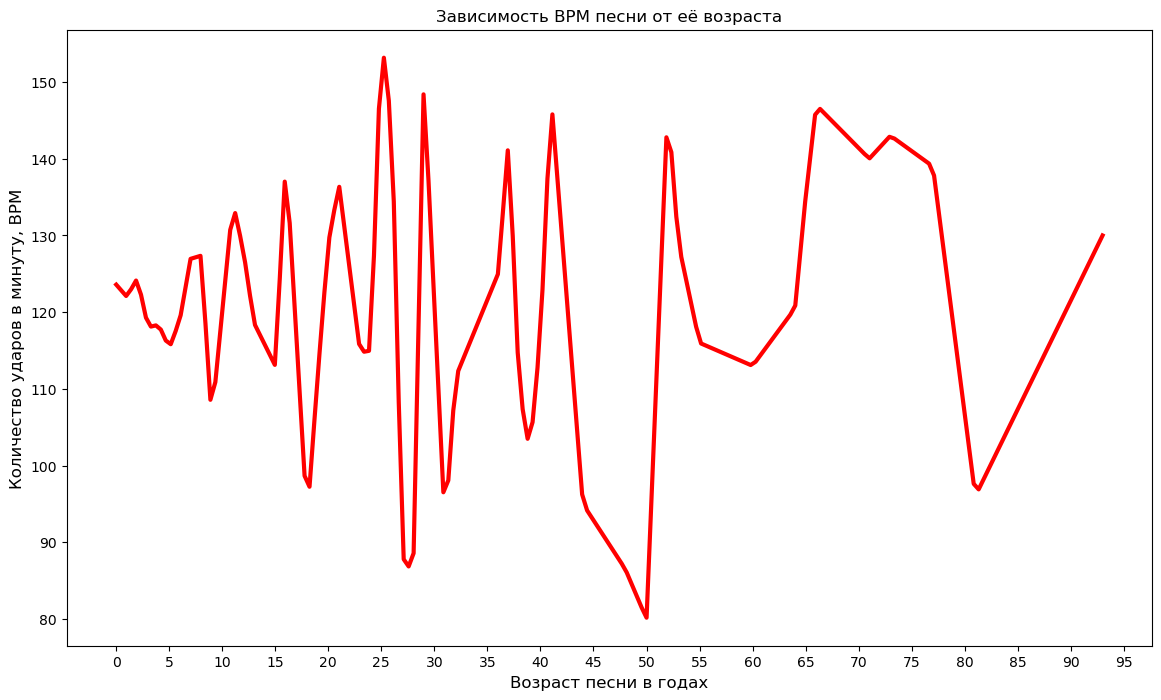

In [86]:
from scipy.interpolate import make_interp_spline, BSpline
# ОПРЕДЕЛЯЕМ ВЫБОРКИ И КОНСТАНТЫ ДЛЯ ДИАГРАММЫ
age_bpm = clear_ds.loc[:, ['track_age', 'bpm']]
group_ds_age_bpm = age_bpm.groupby('track_age', as_index=False).aggregate({'bpm': 'mean'})
group_ds_age_bpm = group_ds_age_bpm.rename(columns={'bpm': 'mean'}) # Переименуем для читабельности
group_ds_age_bpm  = group_ds_age_bpm.sort_values(by = 'track_age', ascending=True)
x = group_ds_age_bpm['track_age']
y = group_ds_age_bpm['mean']
# ИНИЦИАЛИЗИРУЕМ ДИАГРАММУ И ОПРЕДЕЛЯЕМ ЕЁ ФУНКЦИИ
xnew = np.linspace (x. min (), x. max (), 200 ) 
spl = make_interp_spline (x, y, k= 1)
y_smooth = spl (xnew)

fig, ax = plt.subplots(figsize=(14, 8))
plt.plot (xnew, y_smooth, 'r', lw=3)
# НАСТРАИВАЕМ ВНЕШНИЕ ПАРАМЕТРЫ ДИАГРАММЫ И ВЫВОДИМ ЕЁ
plt.ylabel("Количество ударов в минуту, BPM", fontsize=12)
plt.xlabel("Возраст песни в годах", fontsize=12)
plt.title('Зависимость BPM песни от её возраста')
plt.xticks(np.arange(0, 96, step=5))
plt.show()

Из данного графика можно сделать **вывод о том, что более возрастные песни(>10 лет) очень сильно колеблются по количеству ударов в минуту**                                                                                                                      
То есть в разные времена использовали очень отличающиееся BPM(от 80 до 155).                                                   
Однако **ближе к нашему времени(возраст 0-10 лет) все песни закрепились примерно к одному значению BPM - от 110 до 125**           
После 45 лет график имеет большую протяжённость по оси x, потому что в этой возрастной категории статистики меньше(там среднее значение имеется не на каждый год)

# Точечный график/линия наилучшего соответствия - зависимость прослушиваний от стиля песни

Для начала посмотрим, что получится если вывести точечную диагрмму зависимости прослушиваний песни от её энергичности(%)

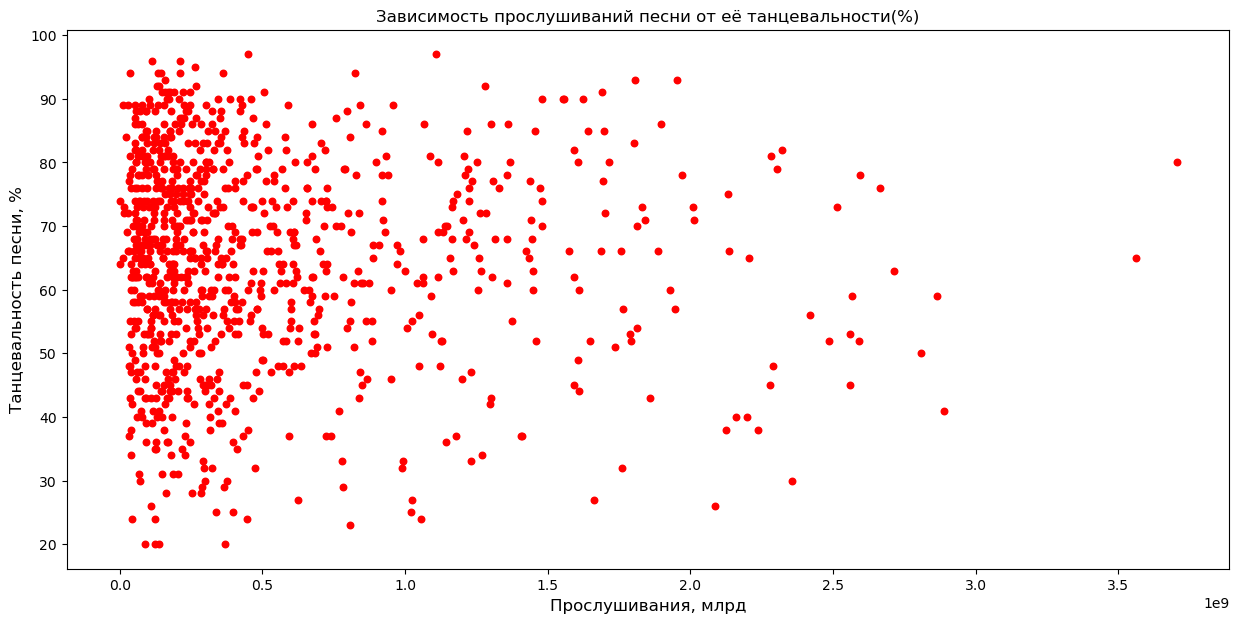

In [87]:
# ОПРЕДЕЛЯЕМ ВЫБОРКИ И КОНСТАНТЫ ДЛЯ ДИАГРАММЫ
x = np.array(clear_ds['streams'])
y1 = np.array(clear_ds['energy_%'])
# ИНИЦИАЛИЗИРУЕМ ДИАГРАММУ И ОПРЕДЕЛЯЕМ ЕЁ ФУНКЦИИ
a1, b1 = np.polyfit (x, y1, 1)
plt.scatter (x, y1, color='red', s=22)
# НАСТРАИВАЕМ ВНЕШНИЕ ПАРАМЕТРЫ ДИАГРАММЫ И ВЫВОДИМ ЕЁ
plt.ylabel("Танцевальность песни, %", fontsize=12)
plt.xlabel("Прослушивания, млрд", fontsize=12)
plt.title('Зависимость прослушиваний песни от её танцевальности(%)')
plt.show()

Единственное, что можно понять из этого изображения - это то , что большая часть прослушиваний(0-5) колеблется выше 20% энергичности песни

Чтобы лучше понимать, что происходит, давайте построим линию наилучшего соответствия

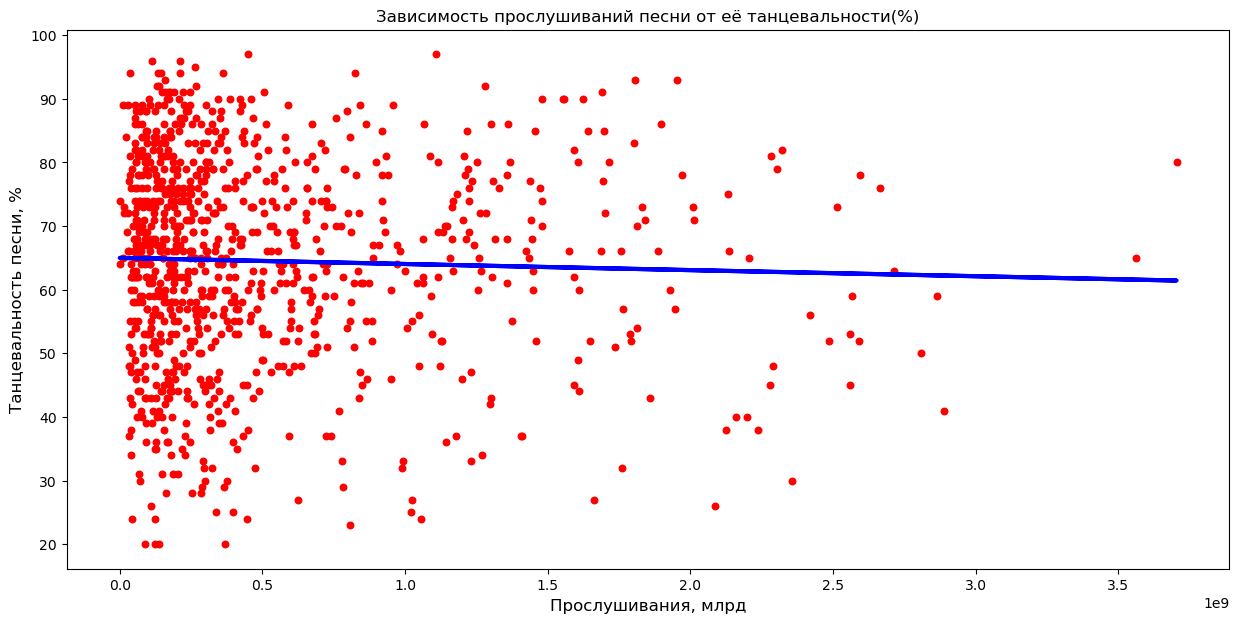

In [88]:
# ИНИЦИАЛИЗИРУЕМ ДИАГРАММУ И ОПРЕДЕЛЯЕМ ЕЁ ФУНКЦИИ
plt.scatter(x, y1, color='red', s=22)
plt.plot (x, a1*x + b1, 'b-', lw=3)
# НАСТРАИВАЕМ ВНЕШНИЕ ПАРАМЕТРЫ ДИАГРАММЫ И ВЫВОДИМ ЕЁ
plt.ylabel("Танцевальность песни, %", fontsize=12)
plt.xlabel("Прослушивания, млрд", fontsize=12)
plt.title('Зависимость прослушиваний песни от её танцевальности(%)')
plt.show()

Теперь стало немного понятнее - прослушивания немного увеличиваются при уменьшении энергичности(всё это происходит в среднем при 60-65% энергичности)

Давайте построим аналогичные линии для позитивности(%) и для танцевальности(%) песни и наложим три графика друг на друга       
Точки не будем выводить, чтобы они не мешались

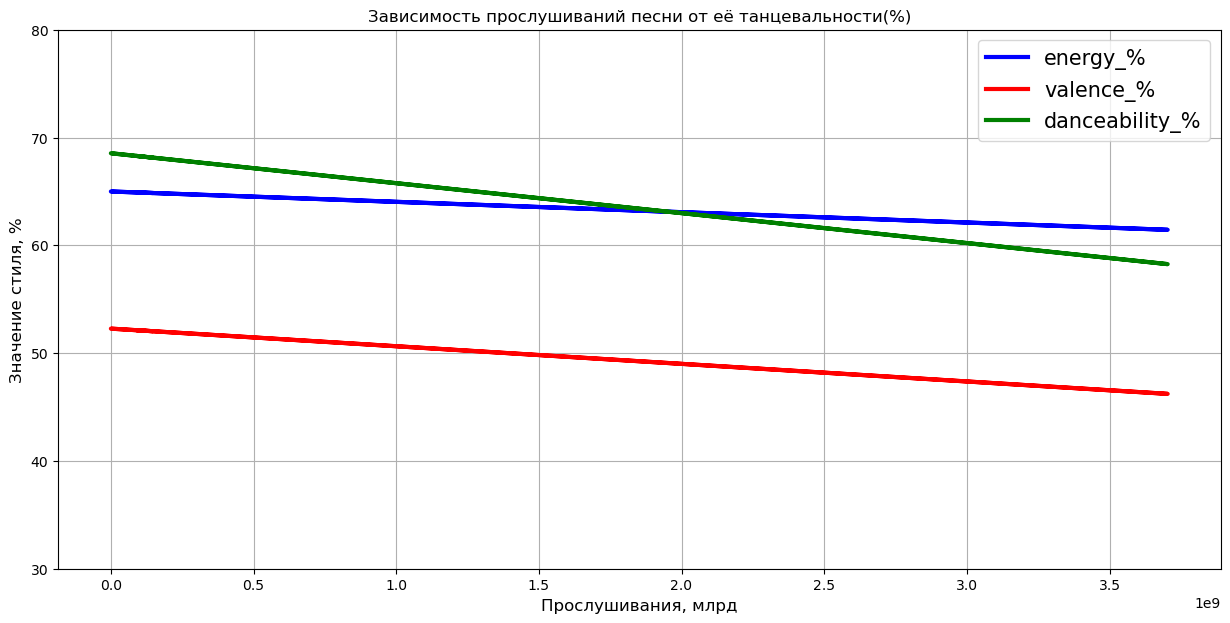

In [89]:
# ОПРЕДЕЛЯЕМ ВЫБОРКИ И КОНСТАНТЫ ДЛЯ ДИАГРАММЫ
y1 = np.array(clear_ds['energy_%'])
y2 = np.array(clear_ds['valence_%'])
y3 = np.array(clear_ds['danceability_%'])
a1, b1 = np.polyfit (x, y1, 1)
a2, b2 = np.polyfit (x, y2, 1)
a3, b3 = np.polyfit (x, y3, 1)
# ИНИЦИАЛИЗИРУЕМ ДИАГРАММУ И ОПРЕДЕЛЯЕМ ЕЁ ФУНКЦИИ
plt.plot (x, a1*x + b1, 'b-', lw=3)
plt.plot (x, a2*x + b2, 'r-', lw=3)
plt.plot (x, a3*x + b3, 'g-', lw=3)
# НАСТРАИВАЕМ ВНЕШНИЕ ПАРАМЕТРЫ ДИАГРАММЫ И ВЫВОДИМ ЕЁ
plt.ylabel("Значение стиля, %", fontsize=12)
plt.xlabel("Прослушивания, млрд", fontsize=12)
plt.title('Зависимость прослушиваний песни от её танцевальности(%)')
plt.yticks(np.arange(30, 90, step=10))
plt.legend(['energy_%', 'valence_%', 'danceability_%'], fontsize=15)
plt.grid()
plt.show()

Теперь мы наглядно видим влияние энергичности, позитивности и танцевальности песни на её прослушивания                        

Можно сделать **вывод, что каждый из этих показателей при его уменьшении положительно влияет на прослушивания**, однако влияение на прослушивания у танцевальности песни сильнее, чем у двух остальных.                                                                 
Так же стоит отметить, что такая зависимость в среднем работает у позитивности в пределах 45-52%, а у остальных двух признаков в пределах 60-70% значения показателя.

### Перевёрнутая столбчатая диаграмма - зависимость прослушиваний от количества исполнителей

Проверим снова влияние на прослушивания, так как это по сути один из важнейших показателей успеха песни                        
В этот раз проверим как влияет количество исполнителей на прослушивания

Сначала сгруппируем столбец количества артистов и сложим все их прослушивания.                                                 
После этого построим красивую диаграмму

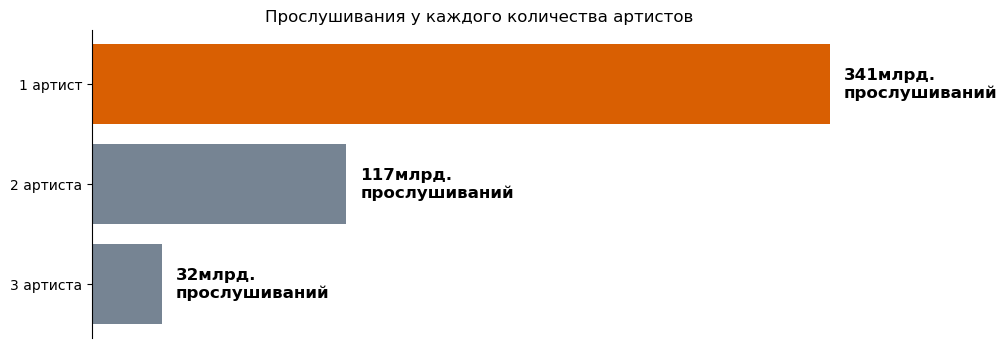

In [90]:
group_ds_artist_count = clear_ds.groupby('artist_count', as_index=False).aggregate({'streams': 'sum'})
group_ds_artist_count = group_ds_artist_count.rename(columns={'streams': 'sum'}) # Переименуем для читабельности
x = group_ds_artist_count['artist_count']
y = group_ds_artist_count['sum']/1000000000 # Будем считать в миллиардах
# ОПРЕДЕЛЯЕМ ВЫБОРКИ И КОНСТАНТЫ ДЛЯ ДИАГРАММЫ
x_list = x
y_list = y.sort_values()
colors = ['#768493', '#768493', '#d95f02']
# ИНИЦИАЛИЗИРУЕМ ДИАГРАММУ И ОПРЕДЕЛЯЕМ ЕЁ ФУНКЦИИ
fig, ax = plt.subplots(figsize=(10, 4))
bars = plt.barh(x_list, y_list, height=0.8, color=colors)
# НАСТРАИВАЕМ ВНЕШНИЕ ПАРАМЕТРЫ ДИАГРАММЫ И ВЫВОДИМ ЕЁ
ax.bar_label(bars, padding=10, color='black',
    fontsize=12, label_type='edge', fmt='%1.0fмлрд.\nпрослушиваний',
    fontweight='bold')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
plt.yticks(np.arange(1, 4, step=1), ['3 артистa','2 артиста', '1 артист'])
plt.title('Прослушивания у каждого количества артистов')
plt.show()

Можно сделать **вывод, что большего успеха у слушателей добиваются песни, исполненные одним артистом, песни с 2 и 3 исполнителями имеют намного более низкие показатели прослушиваний**

# Выводы

- Мы научились анализировать и обрабатывать данные с помощью языка Python и его библоиотек
- Провели предобработку для датасета(обработали выбросы, дубликаты и пропуски)
- Создали несколько новых интересных признаков для исходного датасета
- Проанализировали данные из датасета
- Реализовали несколько визуализаций для полученного набора данных
- Детально проанализировали датасет с большим количеством данных